# Anxiety Level Classification using Machine Learning

## Project Overview
The objective of this project is to classify individuals into different anxiety levels based on their lifestyle, health, and behavioral attributes. The project aims to assist in early identification of anxiety severity so that appropriate interventions can be planned.

This is a **classification problem**, where the target variable is derived from the original anxiety score and grouped into meaningful categories.


## Problem Statement
Mental health disorders, especially anxiety, are becoming increasingly common. However, identifying anxiety levels early using objective indicators such as sleep patterns, stress levels, physical activity, and medical history is challenging.

This project attempts to solve this problem by building a machine learning classification model that predicts anxiety severity levels using historical data.


## Data Description

- **Data Source:** Kaggle
- **Total Records:** 11,000
- **Total Features:** 20 (before encoding)
- **Target Variable:** anxiety score (1–10)

### Key Features:
- Age
- Sleep Hours
- Physical Activity
- Stress Level
- Therapy Sessions
- Caffeine Intake
- Lifestyle and Medical Indicators

### Target Variable Creation:
The original anxiety score (1–10) was converted into categorical classes:

- 0 → Low Anxiety
- 1 → High Anxiety

This transformation converts the problem into a **binary classification task**, making it more suitable for classification algorithms.


In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [70]:
df=pd.read_csv("enhanced_anxiety_dataset.csv")
df.head()


,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0


## Initial Data Inspection

After loading the dataset, an initial inspection was performed to understand the structure and contents of the data.

- `df.head()` was used to preview the first few rows of the dataset
- This helps verify that the data is loaded correctly
- It provides a quick overview of feature names, data types, and sample values
- It also helps identify any obvious data issues such as incorrect values or formatting problems

At this stage, no transformations are applied; the goal is only to understand the raw data.


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Occupation                         11000 non-null  object 
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  object 
 8   Family History of Anxiety          11000 non-null  object 
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Heart Rate (bpm)                   11000 non-null  int64  
 11  Breathing Rate (breaths/min)       11000 non-null  int

In [72]:
df.describe()

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Anxiety Level (1-10)
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,40.241727,6.650691,2.942136,286.090000,9.701636,5.856364,90.916000,20.957545,3.080636,2.427818,5.181818,3.929364
std,13.236140,1.227509,1.827825,144.813157,5.689713,2.927202,17.325721,5.160107,1.398877,2.183106,2.895243,2.122533
min,18.000000,2.300000,0.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,1.000000,1.000000
25%,29.000000,5.900000,1.500000,172.000000,5.000000,3.000000,76.000000,17.000000,2.000000,1.000000,3.000000,2.000000
50%,40.000000,6.700000,2.800000,273.000000,10.000000,6.000000,92.000000,21.000000,3.000000,2.000000,5.000000,4.000000
75%,51.000000,7.500000,4.200000,382.000000,15.000000,8.000000,106.000000,25.000000,4.000000,4.000000,8.000000,5.000000
max,64.000000,11.300000,10.100000,599.000000,19.000000,10.000000,119.000000,29.000000,5.000000,12.000000,10.000000,10.000000


## Dataset Structure and Summary

- `df.info()` was used to examine data types and confirm that there are no missing values
- `df.describe()` provides statistical summaries for numerical features, including mean, standard deviation, and range
- This step helps in identifying skewness, outliers, and scale differences among features


In [73]:
df["Anxiety Level (1-10)"].value_counts().sort_values(ascending=False)

Anxiety Level (1-10)
4.0     2416
3.0     2407
2.0     1756
5.0     1629
1.0     1039
6.0      616
8.0      363
9.0      329
10.0     322
7.0      123
Name: count, dtype: int64

In [74]:
#EDA and preprocessing
df.isna().sum()

Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm)                     0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Anxiety Level (1-10)                 0
dtype: int64

In [75]:
#statistical distribution check for outlier and skewness pre-processing

In [76]:
num_cols=df.select_dtypes(["int","float"]).columns
num_cols

Index(['Age', 'Sleep Hours', 'Physical Activity (hrs/week)',
       'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)',
       'Stress Level (1-10)', 'Heart Rate (bpm)',
       'Breathing Rate (breaths/min)', 'Sweating Level (1-5)',
       'Therapy Sessions (per month)', 'Diet Quality (1-10)',
       'Anxiety Level (1-10)'],
      dtype='object')

In [77]:
df[num_cols].describe()

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Anxiety Level (1-10)
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,40.241727,6.650691,2.942136,286.090000,9.701636,5.856364,90.916000,20.957545,3.080636,2.427818,5.181818,3.929364
std,13.236140,1.227509,1.827825,144.813157,5.689713,2.927202,17.325721,5.160107,1.398877,2.183106,2.895243,2.122533
min,18.000000,2.300000,0.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,1.000000,1.000000
25%,29.000000,5.900000,1.500000,172.000000,5.000000,3.000000,76.000000,17.000000,2.000000,1.000000,3.000000,2.000000
50%,40.000000,6.700000,2.800000,273.000000,10.000000,6.000000,92.000000,21.000000,3.000000,2.000000,5.000000,4.000000
75%,51.000000,7.500000,4.200000,382.000000,15.000000,8.000000,106.000000,25.000000,4.000000,4.000000,8.000000,5.000000
max,64.000000,11.300000,10.100000,599.000000,19.000000,10.000000,119.000000,29.000000,5.000000,12.000000,10.000000,10.000000


In [78]:
from scipy.stats import skew
df[num_cols].skew()

Age                                  0.097336
Sleep Hours                         -0.224472
Physical Activity (hrs/week)         0.507010
Caffeine Intake (mg/day)             0.323941
Alcohol Consumption (drinks/week)   -0.023334
Stress Level (1-10)                 -0.160872
Heart Rate (bpm)                    -0.119204
Breathing Rate (breaths/min)        -0.141205
Sweating Level (1-5)                -0.073929
Therapy Sessions (per month)         1.035117
Diet Quality (1-10)                  0.161948
Anxiety Level (1-10)                 1.043996
dtype: float64

## Numerical Data Summary and Skewness Observation

The `describe()` function was used to understand the basic statistical properties of numerical features such as mean, standard deviation, minimum, and maximum values.

From the summary:
- Most numerical features like **Age, Stress Level, Heart Rate, Diet Quality, and Breathing Rate** are reasonably distributed and fall within expected ranges.
- **Therapy Sessions (per month)** and **Caffeine Intake (mg/day)** show a right-skewed distribution, as their maximum values are much higher compared to the median.
- **Sleep Hours** shows a slight left skew, but it is not severe.
- No extreme or invalid values were found in the numerical columns.

Age


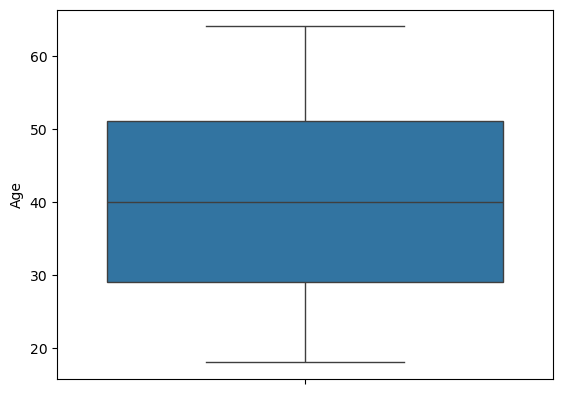

Sleep Hours


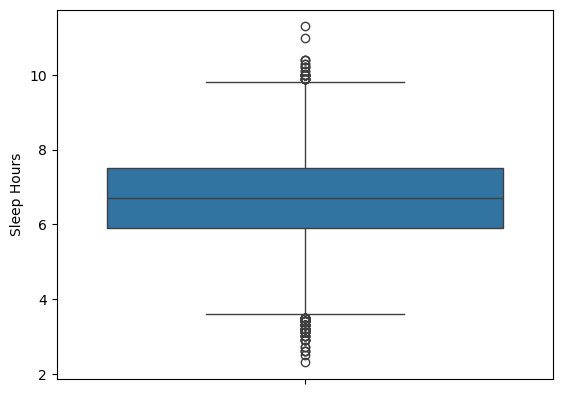

Physical Activity (hrs/week)


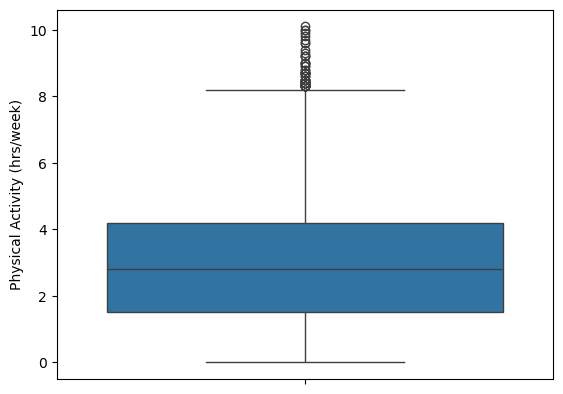

Caffeine Intake (mg/day)


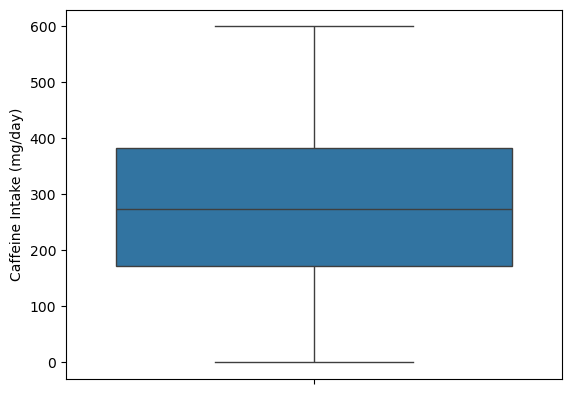

Alcohol Consumption (drinks/week)


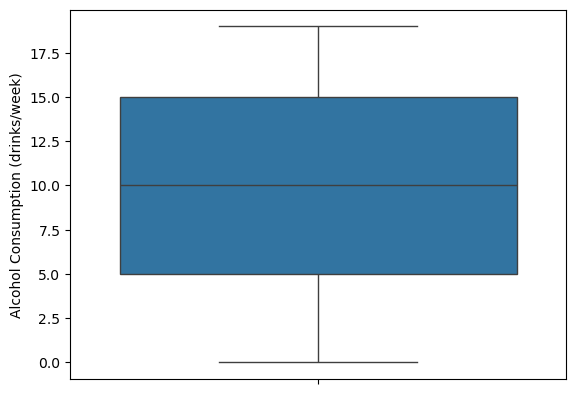

Stress Level (1-10)


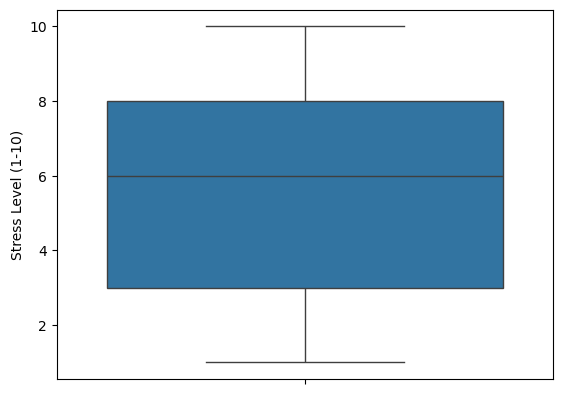

Heart Rate (bpm)


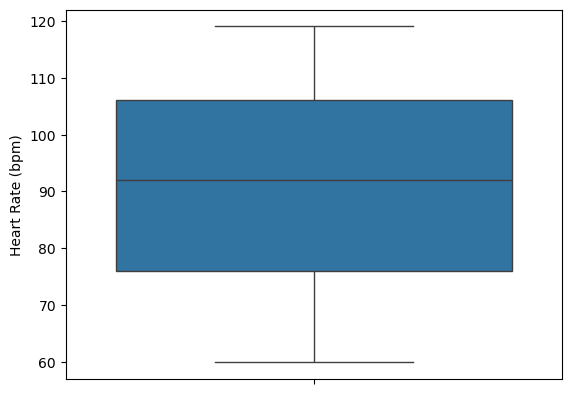

Breathing Rate (breaths/min)


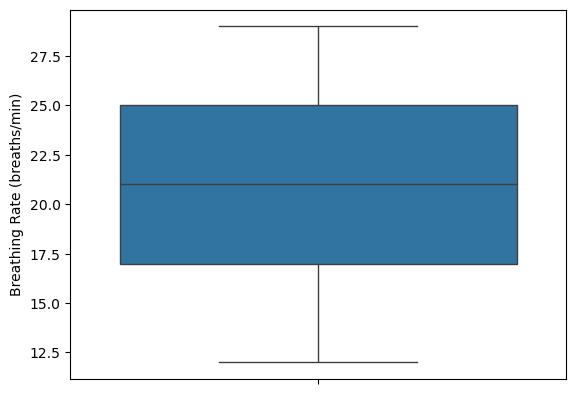

Sweating Level (1-5)


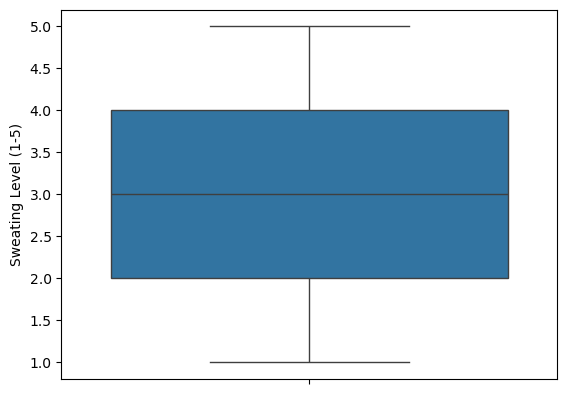

Therapy Sessions (per month)


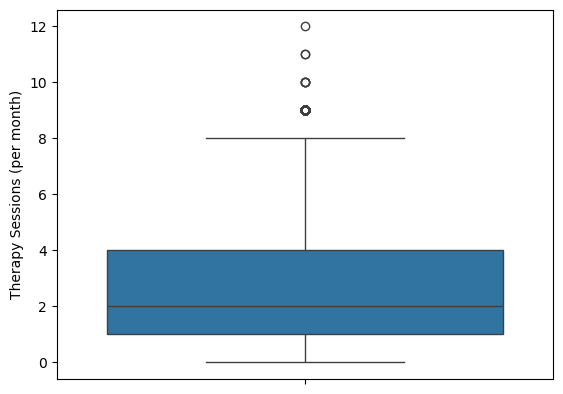

Diet Quality (1-10)


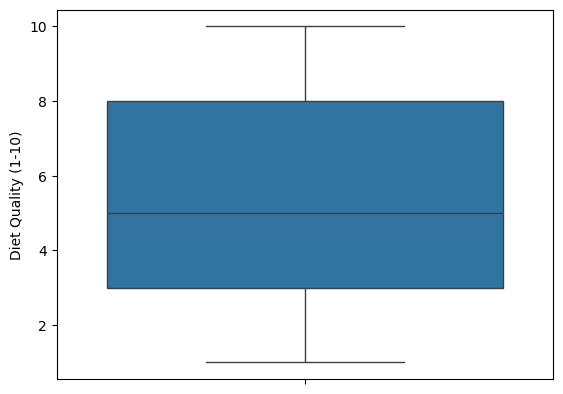

Anxiety Level (1-10)


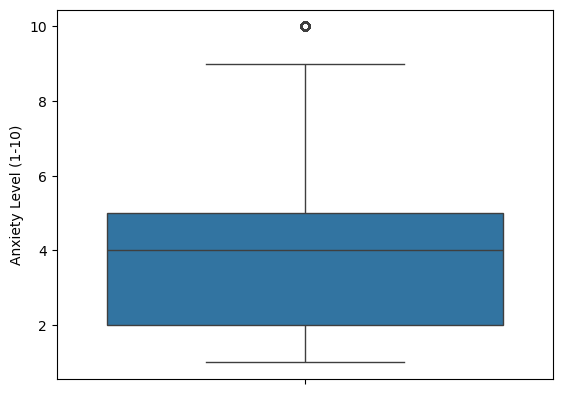

In [79]:
for i in num_cols:
    print(i)
    sns.boxplot(df[i])
    plt.show()

## Outlier Detection using Boxplots

Boxplots were used to visually identify outliers in numerical features.

From the analysis:
- **Therapy Sessions (per month)** shows a few higher values, indicating that some individuals attend therapy more frequently.
- **Physical Activity (hrs/week)** contains some higher values, which may represent individuals with very active lifestyles.
- **Sleep Hours** shows a few lower and higher values, reflecting irregular sleep patterns in some individuals.

These values are not incorrect or abnormal in a real-world context and represent valid behavioral differences among individuals.

No outlier removal was performed. Keeping these values helps preserve important information in the dataset.


In [80]:
#object encoding 
obj_cols=df.select_dtypes("object").columns
obj_cols

Index(['Gender', 'Occupation', 'Smoking', 'Family History of Anxiety',
       'Dizziness', 'Medication', 'Recent Major Life Event'],
      dtype='object')

## Encoding Categorical Variables

The dataset contains several categorical (object-type) features such as gender, occupation, smoking habits, and medical history indicators.  
Since machine learning models require numerical input, these categorical variables must be converted into a numerical format.

In [81]:
for i in obj_cols:
    print(f"{i}: {df[i].value_counts()}")

Gender: Gender
Female    3730
Male      3657
Other     3613
Name: count, dtype: int64
Occupation: Occupation
Musician      892
Artist        888
Student       878
Nurse         861
Chef          858
Doctor        842
Other         840
Freelancer    838
Engineer      833
Scientist     832
Athlete       822
Lawyer        809
Teacher       807
Name: count, dtype: int64
Smoking: Smoking
Yes    5779
No     5221
Name: count, dtype: int64
Family History of Anxiety: Family History of Anxiety
Yes    5847
No     5153
Name: count, dtype: int64
Dizziness: Dizziness
Yes    5672
No     5328
Name: count, dtype: int64
Medication: Medication
Yes    5666
No     5334
Name: count, dtype: int64
Recent Major Life Event: Recent Major Life Event
Yes    5623
No     5377
Name: count, dtype: int64


In [82]:
binary_cols=["Smoking","Family History of Anxiety","Dizziness","Medication","Recent Major Life Event"]

In [83]:
df[binary_cols]=df[binary_cols].replace({"Yes":1,"No":0})

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Occupation                         11000 non-null  object 
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  int64  
 8   Family History of Anxiety          11000 non-null  int64  
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Heart Rate (bpm)                   11000 non-null  int64  
 11  Breathing Rate (breaths/min)       11000 non-null  int

In [85]:
nominal_cols=["Gender","Occupation"]

In [86]:
df=pd.get_dummies(df,columns=nominal_cols,drop_first=True)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Sleep Hours                        11000 non-null  float64
 2   Physical Activity (hrs/week)       11000 non-null  float64
 3   Caffeine Intake (mg/day)           11000 non-null  int64  
 4   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 5   Smoking                            11000 non-null  int64  
 6   Family History of Anxiety          11000 non-null  int64  
 7   Stress Level (1-10)                11000 non-null  int64  
 8   Heart Rate (bpm)                   11000 non-null  int64  
 9   Breathing Rate (breaths/min)       11000 non-null  int64  
 10  Sweating Level (1-5)               11000 non-null  int64  
 11  Dizziness                          11000 non-null  int

In [88]:
bool_cols=df.select_dtypes("bool").columns
df[bool_cols]=df[bool_cols].astype(int)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Sleep Hours                        11000 non-null  float64
 2   Physical Activity (hrs/week)       11000 non-null  float64
 3   Caffeine Intake (mg/day)           11000 non-null  int64  
 4   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 5   Smoking                            11000 non-null  int64  
 6   Family History of Anxiety          11000 non-null  int64  
 7   Stress Level (1-10)                11000 non-null  int64  
 8   Heart Rate (bpm)                   11000 non-null  int64  
 9   Breathing Rate (breaths/min)       11000 non-null  int64  
 10  Sweating Level (1-5)               11000 non-null  int64  
 11  Dizziness                          11000 non-null  int

## Encoding Categorical Variables

The dataset contains several categorical (object-type) features such as Gender, Occupation, Smoking habits, and medical history indicators.  
Since machine learning models require numerical inputs, these categorical variables were converted into numerical form using appropriate encoding techniques.

Binary categorical variables such as Smoking, Family History of Anxiety, Dizziness, Medication, and Recent Major Life Event were encoded using binary mapping:
- **Yes → 1**
- **No → 0**

Nominal variables like Gender and Occupation were encoded using **One-Hot Encoding** to avoid introducing any ordinal relationship between categories.  
The `drop_first=True` option was used to prevent multicollinearity.

After encoding, all categorical features were successfully transformed into numerical format and the dataset became fully model-ready.

---

In [90]:
feature=df.drop(columns="Anxiety Level (1-10)")
target=df["Anxiety Level (1-10)"]

In [91]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
feature.iloc[:]=ss.fit_transform(feature.iloc[:])

In [92]:
feature.head()

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),...,Occupation_Doctor,Occupation_Engineer,Occupation_Freelancer,Occupation_Lawyer,Occupation_Musician,Occupation_Nurse,Occupation_Other,Occupation_Scientist,Occupation_Student,Occupation_Teacher
0,-0.849359,-0.530115,-0.132478,-0.725727,0.052442,0.950496,-1.065213,1.415627,1.332415,-1.348395,...,-0.287907,-0.286237,-0.287166,-0.281751,-0.297064,-0.291410,-0.287536,-0.286051,-0.29452,-0.281375
1,0.435061,-0.367176,1.508891,-0.594517,-0.299086,0.950496,0.938779,-1.659122,-1.669040,0.395834,...,-0.287907,-0.286237,-0.287166,-0.281751,-0.297064,3.431595,-0.287536,-0.286051,-0.29452,-0.281375
2,1.795036,-1.344810,0.414645,-1.167696,-1.002141,-1.052082,0.938779,-1.659122,0.004849,1.364850,...,-0.287907,-0.286237,-0.287166,-0.281751,-0.297064,-0.291410,3.477821,-0.286051,-0.29452,-0.281375
3,-1.529347,-0.693054,-0.077766,0.510405,-0.650614,0.950496,-1.065213,-0.634206,-0.283753,-0.766985,...,-0.287907,-0.286237,-0.287166,-0.281751,-0.297064,-0.291410,-0.287536,3.495877,-0.29452,-0.281375
4,0.661724,1.262214,-0.351328,-0.269946,-1.002141,0.950496,-1.065213,-1.659122,0.408890,-0.379379,...,-0.287907,-0.286237,-0.287166,-0.281751,-0.297064,-0.291410,3.477821,-0.286051,-0.29452,-0.281375


In [93]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(feature,target,test_size=0.20,random_state=1)


In [94]:
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(8800, 30) (8800,)
(2200, 30) (2200,)



## Train–Test Split

The dataset was divided into training and testing sets to evaluate model generalization.

- **Training set:** 80%  
- **Testing set:** 20%  
- **Random state:** Fixed for reproducibility  

This ensures that model performance is evaluated on unseen data.

---

In [95]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    # checking for overfit and underfit
    print(f'Training Score : {model.score(xtrain, ytrain)}')
    print(f'Testing Score : {model.score(xtest, ytest)}')
    # evaluation metrics
    c = pd.DataFrame(confusion_matrix(ytest, ypred),
                     index = [1,2,3,4,5,6,7,8,9,10],
                     columns = [1,2,3,4,5,6,7,8,9,10])
    print(f'Confusion Matrix : \n{c}')
    print(f'Classification Report : \n{classification_report(ytest, ypred)}')
    return model

In [96]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier


In [97]:
dt=mymodel(DecisionTreeClassifier())
dt

Training Score : 1.0
Testing Score : 0.2786363636363636
Confusion Matrix : 
    1   2    3    4   5   6   7   8   9   10
1   68  76   58   15   7   0   0   0   0   0
2   73  87  104   66  22   5   0   0   0   0
3   39  96  147  126  80  14   3   0   0   0
4   15  61  110  141  90  48   8   1   1   0
5    5  13   46  103  78  42   8   2   3   0
6    1   4   19   36  29  16   6   0   0   0
7    0   0    0    4  13   4   1   0   0   0
8    0   0    0    0   1   2   0  33  22  26
9    0   0    0    1   2   1   1  13  21  20
10   0   0    0    1   1   1   0  15  24  21
Classification Report : 
              precision    recall  f1-score   support

         1.0       0.34      0.30      0.32       224
         2.0       0.26      0.24      0.25       357
         3.0       0.30      0.29      0.30       505
         4.0       0.29      0.30      0.29       475
         5.0       0.24      0.26      0.25       300
         6.0       0.12      0.14      0.13       111
         7.0       0.04  

DecisionTreeClassifier()

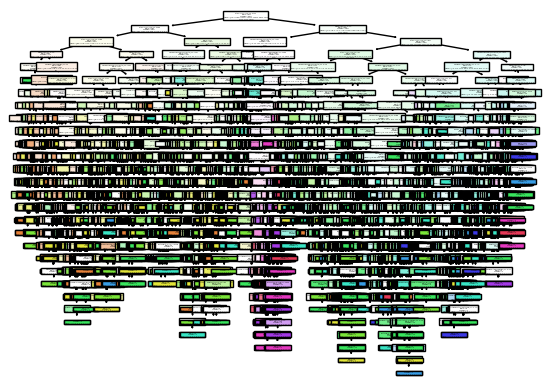

In [98]:
from sklearn import tree
tree.plot_tree(dt,feature_names=feature.columns,filled=True)
plt.show()

In [99]:
dt.get_depth()

28

In [100]:
parameters = {
    'max_depth': list(range(2,4)),
    'min_samples_split': list(range(2,4)),
    'min_samples_leaf': list(range(2,4))
}

In [101]:
from sklearn.model_selection import GridSearchCV 
clf = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, verbose=2)
clf.fit(xtrain, ytrain)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3]},
             verbose=2)

In [102]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)

In [103]:
clf = mymodel(clf.best_estimator_)
clf

Training Score : 0.3502272727272727
Testing Score : 0.33045454545454545
Confusion Matrix : 
    1    2    3    4    5   6   7   8   9   10
1   85   97   29   13    0   0   0   0   0   0
2   77  120   79   74    7   0   0   0   0   0
3   31  121  112  188   53   0   0   0   0   0
4   10   43   56  234  130   0   0   0   2   0
5    0   10   12  138  137   0   0   0   3   0
6    0    2    3   41   64   0   0   0   1   0
7    0    0    0   10   12   0   0   0   0   0
8    0    0    0   10   14   0   0   0  60   0
9    0    0    0    6   14   0   0   0  39   0
10   0    0    0    5    7   0   0   0  51   0
Classification Report : 
              precision    recall  f1-score   support

         1.0       0.42      0.38      0.40       224
         2.0       0.31      0.34      0.32       357
         3.0       0.38      0.22      0.28       505
         4.0       0.33      0.49      0.39       475
         5.0       0.31      0.46      0.37       300
         6.0       0.00      0.00      0.

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)

## Phase 1: Multi-Class Classification (Anxiety Level 1–10)

In the first phase, the original anxiety score (1–10) was treated as a **multi-class classification problem**.

### Decision Tree Classifier (Before Pruning)

A Decision Tree classifier was trained to predict exact anxiety levels from 1 to 10.

**Observations:**
- Training accuracy was very high, indicating **overfitting**
- Testing accuracy was very low (~27%)
- The confusion matrix showed heavy misclassification between adjacent anxiety levels
- Tree depth was very large, indicating excessive model complexity

This showed that predicting **exact anxiety scores** is difficult due to overlapping patterns and class imbalance.

---

### Decision Tree Classifier (After Pruning)

To control overfitting, **pruning techniques** were applied using:
- `max_depth`
- `min_samples_split`
- `min_samples_leaf`

GridSearchCV was used to identify optimal hyperparameters.

**Observations after pruning:**
- Model complexity was reduced
- Testing accuracy improved slightly
- Performance remained weak for higher anxiety classes

This confirmed that **multi-class prediction (1–10)** is unstable and hard to generalize.

---

## Observations from Phase 1

Although the models achieved reasonable training performance, predicting exact anxiety levels (1–10) proved challenging.  
The distribution of anxiety levels was imbalanced, and nearby classes were frequently misclassified.

This indicated that modeling anxiety as broader categories would provide more stable and interpretable results.

---

In [104]:
def a(x):
    if x <=3:
        return 0
    else:
        return 1
    
df["Anxiety Level (1-10)"]=df["Anxiety Level (1-10)"].apply(a)


In [105]:
df["Anxiety Level (1-10)"].value_counts()

Anxiety Level (1-10)
1    5798
0    5202
Name: count, dtype: int64

In [106]:
features = df.drop(["Anxiety Level (1-10)"], axis=1)
target = df["Anxiety Level (1-10)"]

In [107]:
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=0)
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(8800, 30) (8800,)
(2200, 30) (2200,)


## Phase 2: Anxiety Level Bucketing (Binary Classification)

To simplify the problem and improve interpretability, anxiety levels were converted into **binary classes**:

- **0 → Low Anxiety (1–3)**
- **1 → High Anxiety (4–10)**

This transformation converted the task into a **binary classification problem**, which is more suitable for many machine learning algorithms.

---

In [108]:
from sklearn.linear_model import LogisticRegression

In [109]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    # checking for overfit and underfit
    print(f'Training Score : {model.score(xtrain, ytrain)}')
    print(f'Testing Score : {model.score(xtest, ytest)}')
    # evaluation metrics
    c = pd.DataFrame(confusion_matrix(ytest, ypred),
                     index = ['Low','High'],
                     columns = ['Low','High'])
    print(f'Confusion Matrix : \n{c}')
    print(f'Classification Report : \n{classification_report(ytest, ypred)}')
    return model

In [110]:
lm=mymodel(LogisticRegression())
lm

Training Score : 0.8075
Testing Score : 0.8018181818181818
Confusion Matrix : 
      Low  High
Low   810   212
High  224   954
Classification Report : 
              precision    recall  f1-score   support

           0       0.78      0.79      0.79      1022
           1       0.82      0.81      0.81      1178

    accuracy                           0.80      2200
   macro avg       0.80      0.80      0.80      2200
weighted avg       0.80      0.80      0.80      2200



LogisticRegression()



## Logistic Regression (Binary Classification)

Logistic Regression was applied after feature scaling.

**Results:**
- Balanced training and testing accuracy (~80%)
- Good precision and recall for both classes
- No significant overfitting observed

**Why Logistic Regression worked well:**
- Binary target variable
- Linear decision boundary after scaling
- Probabilistic interpretation using the sigmoid function

This made Logistic Regression a strong and interpretable baseline model.

---

In [111]:
dt=mymodel(DecisionTreeClassifier())

Training Score : 1.0
Testing Score : 0.7209090909090909
Confusion Matrix : 
      Low  High
Low   728   294
High  320   858
Classification Report : 
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1022
           1       0.74      0.73      0.74      1178

    accuracy                           0.72      2200
   macro avg       0.72      0.72      0.72      2200
weighted avg       0.72      0.72      0.72      2200



In [112]:
d = {
    'Features':features.columns,
    'Importance':dt.feature_importances_
}
f = pd.DataFrame(d)
f

,Features,Importance
0,Age,0.048562
1,Sleep Hours,0.074405
2,Physical Activity (hrs/week),0.057802
3,Caffeine Intake (mg/day),0.073287
4,Alcohol Consumption (drinks/week),0.045912
5,Smoking,0.009472
6,Family History of Anxiety,0.006758
7,Stress Level (1-10),0.420597
8,Heart Rate (bpm),0.052007
9,Breathing Rate (breaths/min),0.033833


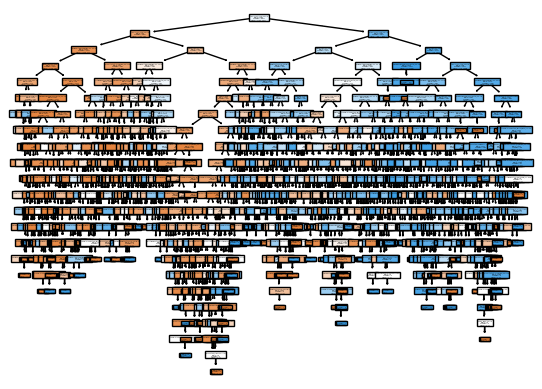

In [113]:
from sklearn import tree
tree.plot_tree(dt,feature_names=features.columns,filled=True)
plt.show()


In [114]:
dt.get_depth()

22

In [115]:
parameters = {
    'max_depth': list(range(2,4)),
    'min_samples_split': list(range(2,4)),
    'min_samples_leaf': list(range(2,4))
}

In [116]:
from sklearn.model_selection import GridSearchCV 
clf = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, verbose=2)
clf.fit(xtrain, ytrain)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s


[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END max_dep

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3]},
             verbose=2)

In [117]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2)

In [118]:
clf = mymodel(clf.best_estimator_)
clf

Training Score : 0.7973863636363636
Testing Score : 0.7795454545454545
Confusion Matrix : 
      Low  High
Low   750   272
High  213   965
Classification Report : 
              precision    recall  f1-score   support

           0       0.78      0.73      0.76      1022
           1       0.78      0.82      0.80      1178

    accuracy                           0.78      2200
   macro avg       0.78      0.78      0.78      2200
weighted avg       0.78      0.78      0.78      2200



DecisionTreeClassifier(max_depth=2, min_samples_leaf=2)

In [119]:
f['After Pruning Importance'] = clf.feature_importances_
f

,Features,Importance,After Pruning Importance
0,Age,0.048562,0.0
1,Sleep Hours,0.074405,0.0
2,Physical Activity (hrs/week),0.057802,0.0
3,Caffeine Intake (mg/day),0.073287,0.0
4,Alcohol Consumption (drinks/week),0.045912,0.0
5,Smoking,0.009472,0.0
6,Family History of Anxiety,0.006758,0.0
7,Stress Level (1-10),0.420597,1.0
8,Heart Rate (bpm),0.052007,0.0
9,Breathing Rate (breaths/min),0.033833,0.0


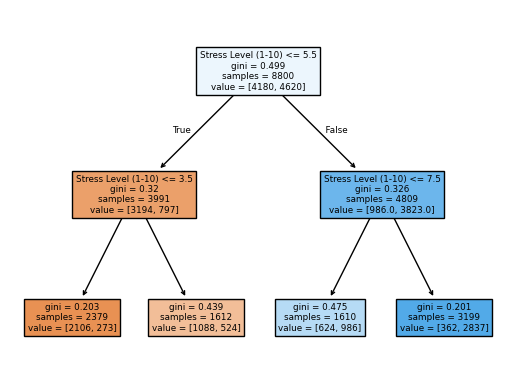

In [120]:
from sklearn import tree
tree.plot_tree(clf,feature_names=features.columns,filled=True)
plt.show()

## Decision Tree Classifier (Binary Classification)

A Decision Tree classifier was trained on the binary target.

**Observations:**
- Initial overfitting with perfect training accuracy
- Pruning reduced variance and improved generalization
- Testing accuracy stabilized around ~78%

Feature importance analysis showed:
- **Stress Level (1–10)** as the most influential feature
- Lifestyle and health indicators also contributed significantly

---

In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
mymodel(RandomForestClassifier())

Training Score : 1.0
Testing Score : 0.7859090909090909
Confusion Matrix : 
      Low  High
Low   784   238
High  233   945
Classification Report : 
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      1022
           1       0.80      0.80      0.80      1178

    accuracy                           0.79      2200
   macro avg       0.78      0.78      0.78      2200
weighted avg       0.79      0.79      0.79      2200



RandomForestClassifier()

In [123]:
# hyperparameter tuning

parameters = {
    'max_depth' : list(range(2,4)),
    'min_samples_split' : list(range(2,4)),
    'min_samples_leaf' : list(range(2,4)),
    'n_estimators' : [70,90,120,130]
}

In [124]:
# hyperparameter tuning where trying to find the right hyperparameter values.
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(RandomForestClassifier(), parameters, verbose=2)
clf.fit(xtrain, ytrain) 

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END max_depth=2, min_samples_leaf=2, min_s

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3],
                         'n_estimators': [70, 90, 120, 130]},
             verbose=2)

In [125]:
clf.best_estimator_

RandomForestClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=3,
                       n_estimators=130)

In [126]:
c = mymodel(clf.best_estimator_)

Training Score : 0.7975
Testing Score : 0.7809090909090909
Confusion Matrix : 
      Low  High
Low   747   275
High  207   971
Classification Report : 
              precision    recall  f1-score   support

           0       0.78      0.73      0.76      1022
           1       0.78      0.82      0.80      1178

    accuracy                           0.78      2200
   macro avg       0.78      0.78      0.78      2200
weighted avg       0.78      0.78      0.78      2200



## Random Forest Classifier (Binary Classification)

A Random Forest classifier was applied to reduce variance and improve robustness.

**Results:**
- Training accuracy close to 1.0
- Testing accuracy around **79%**
- More stable predictions compared to a single decision tree

Hyperparameter tuning using GridSearchCV helped control overfitting and improve generalization.

---

## Model Comparison Summary

| Model                    | Problem Type | Test Accuracy |
|--------------------------|--------------|---------------|
| Decision Tree (Raw)      | Multi-class  | ~27%          |
| Decision Tree (Pruned)   | Multi-class  | ~33%          |
| Logistic Regression      | Binary       | ~80%          |
| Decision Tree (Binary)   | Binary       | ~78%          |
| Random Forest            | Binary       | ~79%          |

---

## Final Model Selection

Although Random Forest achieved slightly higher accuracy, **Logistic Regression** was selected as the final model due to:
- Stable performance
- Better interpretability
- Lower risk of overfitting
- Faster training and inference

---

## Conclusion

This project demonstrates that:
- Exact anxiety score prediction (1–10) is difficult and unstable
- Bucketing anxiety levels into broader categories significantly improves performance
- Proper preprocessing, encoding, scaling, and model selection are critical
- Binary classification provides more reliable and actionable results

The final model can assist in early identification of individuals with high anxiety levels, enabling timely intervention and support.